# Introduction to Xarray

[Xarray](https://github.com/pydata/xarray) is an open source Python package designed to work with lablled multidimensional arrays in an efficient manner. By multidimensional data (also often called N-dimensional), we mean data with many independent dimensions or axes. For example, we might represent Earth’s surface temperature $T$ as a three dimensional variable:

\begin{equation*}
T(x,y,t)
\end{equation*}

where $x$ and $y$ are spatial dimensions and $t$ is time. By labeled, we mean data that has metadata associated with it describing the names and relationships between the variables.

Example of multidimensional data processing using Xarray:

In [18]:
!wget -O ./dataset.nc https://github.com/pangeo-data/tutorial-data/raw/master/sst/NOAA_NCDC_ERSST_v3b_SST-1960.nc

--2023-11-18 19:22:40--  https://github.com/pangeo-data/tutorial-data/raw/master/sst/NOAA_NCDC_ERSST_v3b_SST-1960.nc
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/pangeo-data/tutorial-data/master/sst/NOAA_NCDC_ERSST_v3b_SST-1960.nc [following]
--2023-11-18 19:22:41--  https://raw.githubusercontent.com/pangeo-data/tutorial-data/master/sst/NOAA_NCDC_ERSST_v3b_SST-1960.nc
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8002::154, 2606:50c0:8003::154, 2606:50c0:8000::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8002::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 785127 (767K) [application/octet-stream]
Saving to: ‘./dataset.nc’

./dataset.nc        100%[===================>] 766.73K  --.-KB/s    in 0.08s   

2023-11-18 19:2

In [19]:
import xarray as xr

ds = xr.open_dataset("dataset.nc")
ds

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 12)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 1960-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

## Data Structures

Like Pandas, xarray has two fundamental data structures: a `DataArray`, which holds a single multi-dimensional variable and its coordinates a `Dataset`, which holds multiple variables that potentially share the same coordinates

A `DataArray` has four essential attributes: * values: a numpy.ndarray holding the array’s values `dims`: dimension names for each axis (e.g., `('x', 'y', 'z')`), `coords`: a dict-like container of arrays (coordinates) that label each point (e.g., 1-dimensional arrays of numbers, datetime objects or strings) `attrs`: an `OrderedDict` to hold arbitrary metadata (attributes)

A dataset is simply an object containing multiple `DataArrays` indexed by variable name.

In [20]:
xr.set_options(display_style="html")
ds

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 12)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 1960-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

In [21]:
# attribute syntax
sst = ds.sst  # or sst = ds['sst']

sst

<xarray.DataArray 'sst' (time: 12, lat: 89, lon: 180)>
[192240 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 1960-12-15
Attributes:
    pointwidth:          1.0
    valid_min:           -3.0
    valid_max:           45.0
    units:               degree_Celsius
    long_name:           Extended reconstructed sea surface temperature
    standard_name:       sea_surface_temperature
    iridl:hasSemantics:  iridl:SeaSurfaceTemperature

## Indexing

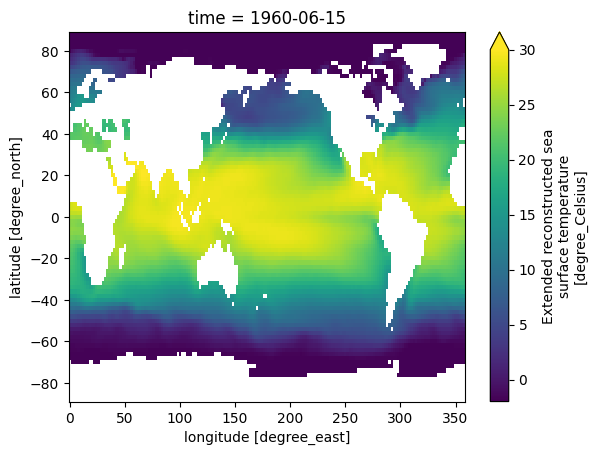

In [22]:
sst.sel(time="1960-06-15").plot(vmin=-2, vmax=30)

We can select along any axis 

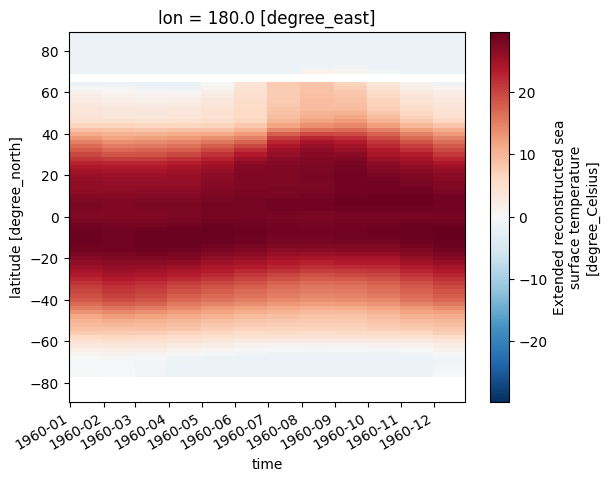

In [23]:
sst.sel(lon=180).transpose().plot()

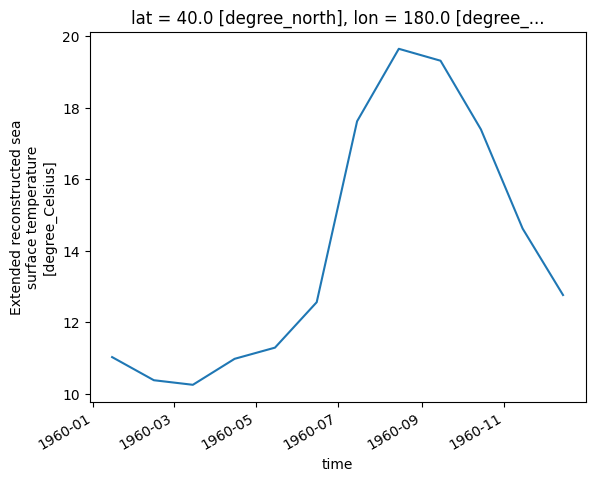

In [24]:
sst.sel(lon=180, lat=40).plot()